In [1]:
pip install wordcloud

In [23]:
pip install nltk

In [30]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [49]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [50]:
import tweepy
import pandas as pd
import csv
import re
import string
import itertools
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [25]:
code_data = open('twittercode.csv')
code = csv.reader(code_data, delimiter=',')
data_code = [row[2] for row in code]

In [26]:
consumer_key = data_code[0]
consumer_secret = data_code[1]
access_token = data_code[2]
access_token_secret = data_code[3]

In [27]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [34]:
hasil = api.user_timeline(id='jokowi', count=200)
list_hasil = [tweet.text for tweet in hasil]

In [57]:
data = []
for kalimat in list_hasil:
    #CASE FOLDING
    #lowercase
    hasil = kalimat.lower()
    #menghapus angka
    hasil = re.sub(r"\d+", "", hasil)
    #menghapus tanda baca
    hasil = hasil.translate(hasil.maketrans("","",string.punctuation))
    #menghapus whitespaces
    hasil = hasil.strip()
    #STOPWORD
    indonesia_s = stopwords.words('indonesian')
    hasil = hasil.split()
    hasil  = [word for word in hasil if word not in indonesia_s]
    hasil = ' '.join(hasil)
    data.append(hasil)

In [58]:
data

['januari daya beli masyarakat konsumsi rumah tangga daya ungkit memacu per… httpstcorjyrgnaa',
 'apbn pemerintah rp triliun program perlindungan sosial kartu sembako p… httpstcokvrjmowr',
 'pemerintah membangun bendungan tanah air bendungan rajui aceh titab… httpstconzjjqkuuru',
 'natal tahuntahun keceriaan keriaan menyelimuti kehidupan… httpstconiheqaex',
 'internet informasi panduan penanganan pasien covid puskesmas pulau weh sabang ak… httpstcozkmfxxhuge',
 'resmi melantik enam menteri perkenalkan kemarin wakil menteri kabi… httpstcojjszowkjy',
 'sore cerah mengumumkan enam nama calon menteri anggota kabinet indonesia maju mereka… httpstcojzlnaphyga',
 'biarlah kenangan pelajaran menatap esok tekad semangat mem… httpstcohyasjhyiu',
 'dunia dihentak pandemi sa… httpstcosphnjhyz',
 'pengucapan sumpah anggota komisi yudisial jabatan digelar istana negara tujuh anggota k… httpstcorcmfltjsm',
 'peluncuran pelabuhan patimban ditandai ekspor perdana mobil merek toyota daihatsu suzuki deng

In [59]:
data = [word_tokenize(paragraf) for paragraf in data]
data = list(itertools.chain(*data))
fqdist = FreqDist(data)

In [60]:
print(fqdist.most_common(10))

[('pandemi', 36), ('indonesia', 28), ('covid', 24), ('pemerintah', 23), ('kerja', 15), ('masyarakat', 12), ('vaksin', 12), ('pagi', 11), ('rumah', 10), ('jalan', 10)]


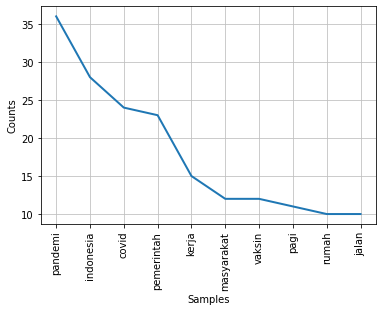

In [61]:
fqdist.plot(10,cumulative=False)
plt.show()

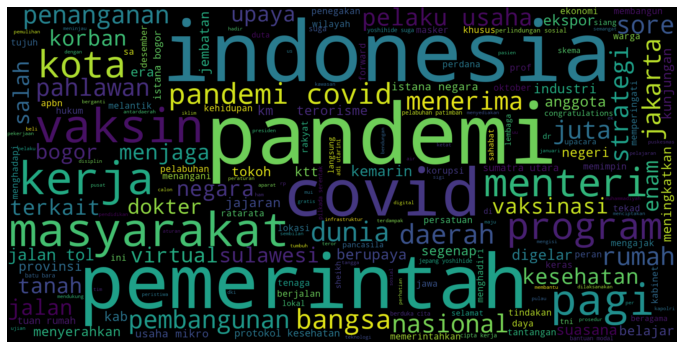

In [62]:
data_1 = ' '.join(data)
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(data_1)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()